*28 November 2020*


1.   **Intro.**
      *   *Importing the data set.* 
2.   **Analysis.**
      *   *Info dataset* 
      *   *Categorical Data.*
      *   *dataset treatment* 
      *   *Missing Data.*
      *   *Dataset Ready*
3.    **Modeling**

# 1. Intro.


> This is my first at a kaggle script.After looking at several scripts for     inspiration I decided to star developing this script, I will use graphics      to explain things a little better and I will use Random Forest to create a model predicting survival on the Titanic. I am new to machine learning and hoping to learn a lot, so feedback is very welcome!



*   *Import libraries and Data Set*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/kaggle/Titanic: Machine Learning from Disaster/train.csv")
test = pd.read_csv("/content/drive/MyDrive/kaggle/Titanic: Machine Learning from Disaster/test.csv")
mix = [train, test] #(1)

(1)we combine the two datasets to do operations in conjunction with them.


---
we analyze the variables that our data set has.
we separate the variables that are categorical into numerical, ordinary and discrete.


In [ ]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Analysis
Analyze and understand the data

## ***Categories and Analysis***

*  Categorical:

    > Survived, Sex, Embarked.

*  Ordinal:

    > Pclass

*  Numeric:

    > Age, Fare.

*  Discrete:

    > SibSp, Parch.



*  we must treat the blank fields and the NaN so that they do not affect our model, but first we need to know that they are also related to our variable: Survived, so as not to do too much work.

In [ ]:
train.info()
print("-"*40)
print("/"*40)
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
////////////////////////////////////////
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Duane, Mr. Frank",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The survival rate of this dataset is 38%, the name is unique as far as we can see, most were traveling with siblings or spouses


*   ticket we can eliminate it since it does not contribute to our model and also there are many repetitions.
*   cabin can be eliminated this very incomplete and repeated, it gives us to understand that the majority went together either with brothers, children or spouses.
*   it will be better to analyze the variable Name to see if it is related to the survival of people.



---
We will analyze how significant the variables are with respect to survival


In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


From what has been seen previously, we know that those of ***Sex = (female)*** had a better survival rate than men, those of ***class = (1)*** also had a better index than the others; ***SibSp*** and ***Parch*** have ***0%*** probability for some cases but in other significant values, it would be better to derive them to propose it in the model.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


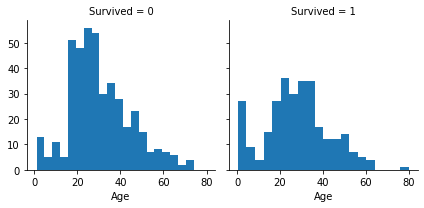

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

As can be seen, children had a better survival rate than those between 20 and 30 years old.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


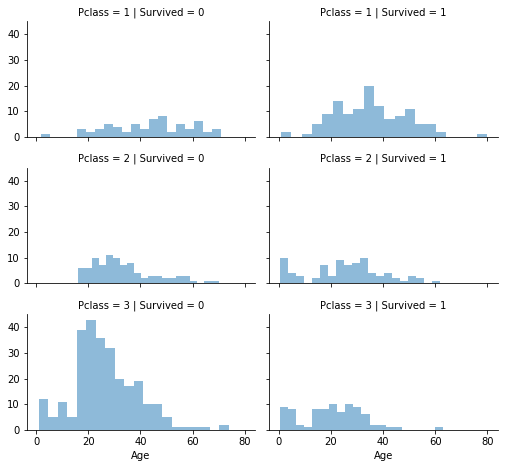

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Survival is also defined by the class they were in, with class = 1 having a better rate than those of more classes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


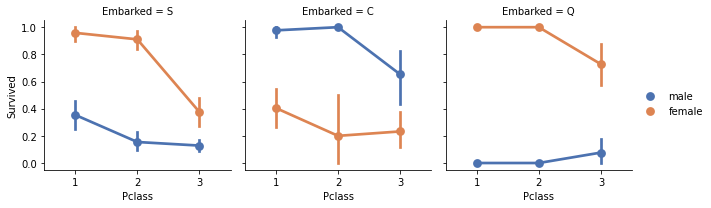

In [ ]:
grid = sns.FacetGrid(train, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

We will take the variable "Embarked" since we can see a relationship with the survivors, although they are more diverse, for example, in Embarked = C more men of class 1 and 2 survived, otherwise in Embarked = Q.

---

Knowing the above, we will eliminate Ticket and Cabin since they do not help our model, we will also complete the age NAN since it is a fundamental variable for our model.

##  ***dataset treatment***


In [ ]:
train = train.drop(['Ticket', 'Cabin'],  axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
mix = [train, test]

In [ ]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name 

In [ ]:
for dataset in mix:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in mix:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in mix:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Separating the terms from the names we realize that some had a better survival rate than others, so we add it to the model and eliminate the name and id variables since we do not need them

In [ ]:
train = train.drop(['PassengerId', 'Name'], axis=1)
test = test.drop(['Name'], axis = 1)
mix = [train, test]

In [ ]:
print(test.shape, test.shape)
print('-'*40)
print(train.head())
print('-'*40)
print(test.head())

(418, 9) (418, 9)
----------------------------------------
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    male  22.0      1      0   7.2500        S      1
1         1       1  female  38.0      1      0  71.2833        C      3
2         1       3  female  26.0      0      0   7.9250        S      2
3         1       1  female  35.0      1      0  53.1000        S      3
4         0       3    male  35.0      0      0   8.0500        S      1
----------------------------------------
   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
0          892       3    male  34.5      0      0   7.8292        Q      1
1          893       3  female  47.0      1      0   7.0000        S      3
2          894       2    male  62.0      0      0   9.6875        Q      1
3          895       3    male  27.0      0      0   8.6625        S      1
4          896       3  female  22.0      1      1  12.2875        S      3


let's change the sex to female = 1, male = 0

In [ ]:
for dataset in mix:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


the probability that a person survived being accompanied (either by siblings, children or spouses)> that they were alone, therefore we classify in a variable those who were alone = "0" and the others in "1", I will not classify with how many women or lovers they went, I will take as family those who are >= 1

In [ ]:
for dataset in mix:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['SibSp'] >= 1, 'IsAlone'] = 1
  dataset.loc[dataset['Parch'] >= 1, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.303538
1,1,0.505650


In [ ]:
train = train.drop(['SibSp', 'Parch'], axis = 1)
test = test.drop(['SibSp', 'Parch'], axis = 1)
mix = [train, test]

In [ ]:
print(train.head())
print('-'*80)
print(test.head())

   Survived  Pclass  Sex   Age     Fare Embarked  Title  IsAlone
0         0       3    0  22.0   7.2500        S      1        1
1         1       1    1  38.0  71.2833        C      3        1
2         1       3    1  26.0   7.9250        S      2        0
3         1       1    1  35.0  53.1000        S      3        1
4         0       3    0  35.0   8.0500        S      1        0
--------------------------------------------------------------------------------
   PassengerId  Pclass  Sex   Age     Fare Embarked  Title  IsAlone
0          892       3    0  34.5   7.8292        Q      1        0
1          893       3    1  47.0   7.0000        S      3        1
2          894       2    0  62.0   9.6875        Q      1        0
3          895       3    0  27.0   8.6625        S      1        0
4          896       3    1  22.0  12.2875        S      3        1


## ***Missing data***

In [ ]:
guess_ages = np.zeros((2,3))
for dataset in mix:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [ ]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


this code snippet is not mine, I took it as it gave me error when replacing the NaN of age by the mean of all other ages :(

---
since we have the ratios of the ages we can replace them in the intervals that show us


In [ ]:
for dataset in mix:    
    dataset.loc[ dataset['Age'] <= 16.0, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.0) & (dataset['Age'] <= 32.0), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.0) & (dataset['Age'] <= 48.0), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.0) & (dataset['Age'] <= 64.0), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64.0, 'Age']
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,0,3,0,1,7.2500,S,1,1,"(16.0, 32.0]"
1,1,1,1,2,71.2833,C,3,1,"(32.0, 48.0]"
2,1,3,1,1,7.9250,S,2,0,"(16.0, 32.0]"
3,1,1,1,2,53.1000,S,3,1,"(32.0, 48.0]"
4,0,3,0,2,8.0500,S,1,0,"(32.0, 48.0]"


In [ ]:
train = train.drop(['AgeBand'], axis = 1)
mix = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,1
1,1,1,1,2,71.2833,C,3,1
2,1,3,1,1,7.9250,S,2,0
3,1,1,1,2,53.1000,S,3,1
4,0,3,0,2,8.0500,S,1,0


we fill the NaNs from Embarked and convert them to better operate with them

In [ ]:
for dataset in mix:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
for dataset in mix:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
dtype: int64

In [ ]:
#we replace by the mean
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for dataset in mix:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
mix = [train, test]

## ***Dataset Ready***

In [ ]:
print(train.head())
print('-'*80)
print(test.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0         0       3    0    1     0         0      1        1
1         1       1    1    2     3         1      3        1
2         1       3    1    1     1         0      2        0
3         1       1    1    2     3         0      3        1
4         0       3    0    2     1         0      1        0
--------------------------------------------------------------------------------
   PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0          892       3    0    2     0         2      1        0
1          893       3    1    2     0         0      3        1
2          894       2    0    3     1         2      1        0
3          895       3    0    1     1         0      1        0
4          896       3    1    1     1         0      3        1


# Modeling


In [ ]:
X_train = train.iloc[:,1:8].values
y_train = train.iloc[:,0].values
X_test  = test.iloc[:, 1:8]
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
classifier = RandomForestClassifier(n_estimators = 15, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred  = classifier.predict(X_test)

In [ ]:
classifier.score(X_train, y_train)
score = round(classifier.score(X_train, y_train) * 100, 2)
score

86.76

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


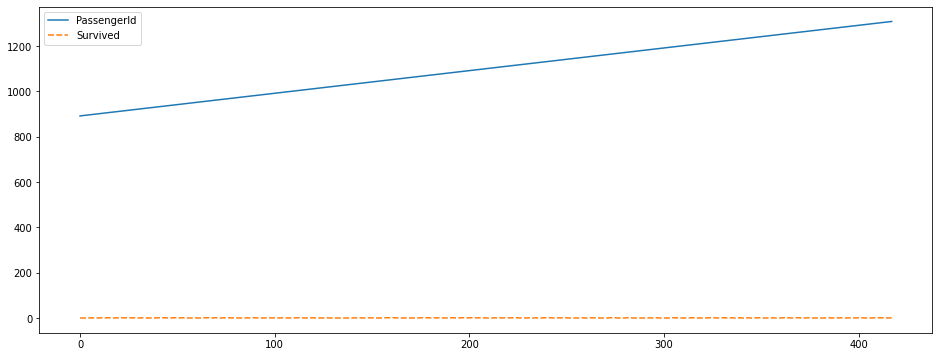

In [75]:
plt.figure(figsize=(16,6))
sns.lineplot(data=y)